<a href="https://colab.research.google.com/github/esevinc/EmotionPrediction/blob/main/EmotionEmovo_Male.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
 
data = pd.read_csv('drive/MyDrive/ravdes/featureEMOVO.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,gender,labels
0,-370.303223,58.331867,-7.632109,15.654898,3.273010,0.692397,-8.063744,5.894156,-5.199350,12.546567,...,17.562779,34.036367,-0.028319,0.053574,-0.043633,-0.009186,0.019449,-0.007346,1,1
1,-374.553833,47.796314,1.653561,20.256063,-6.800525,0.783256,-4.250007,7.473405,-15.591282,14.261038,...,19.162629,34.229551,0.023288,0.050375,-0.021473,0.040849,0.002533,0.025532,1,1
2,-386.473145,75.599594,-15.072874,6.823948,-1.835993,-4.165404,-10.107768,7.045069,-17.148949,11.959360,...,19.843059,34.157690,0.013844,0.000709,-0.032024,-0.007825,0.018322,0.016368,1,1
3,-362.502167,89.977379,-15.514508,5.774208,4.361949,12.591103,-0.374380,-0.392911,-4.743288,15.702434,...,19.053175,32.441757,0.002924,0.020344,-0.057423,0.041032,-0.014291,-0.002126,1,1
4,-412.010406,83.760246,-2.188665,18.547068,0.581788,10.956905,3.381726,3.320800,-9.278383,11.129302,...,18.793145,33.286765,0.001819,0.007893,-0.003650,0.014794,0.000603,0.001663,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-428.723602,127.801125,15.011064,26.158209,-22.814543,10.531158,8.283092,-1.291359,-13.442948,11.084978,...,18.443654,33.880198,-0.017768,0.023105,0.130201,0.076282,-0.008200,-0.029686,2,7
584,-433.270050,98.356888,24.055376,35.478432,-30.932493,11.173256,12.042026,-1.199043,-12.588658,7.034428,...,18.799787,34.613071,-0.027987,-0.025462,-0.003617,0.090180,-0.020973,0.000550,2,7
585,-458.537323,104.085503,15.052121,37.028015,-10.172383,10.071804,2.412206,-3.682174,-7.252892,11.958858,...,18.472471,34.431134,0.087554,0.064611,0.170886,-0.068005,0.058233,-0.019411,2,7
586,-523.336914,88.056267,18.831060,43.098541,-8.197763,15.856596,4.796964,4.109037,-4.488383,12.122023,...,17.343597,33.439551,0.031808,-0.014211,0.000701,-0.059435,0.022520,0.021469,2,7


In [ ]:
data.shape

(588, 195)

In [ ]:
df=data.loc[data.iloc[:,-2] == 2] #Male
#ymale=data.loc[data.iloc[:,-2] == 1]

In [ ]:
data.iloc[:,-2] == 2 #female

0      False
1      False
2      False
3      False
4      False
       ...  
583     True
584     True
585     True
586     True
587     True
Name: gender, Length: 588, dtype: bool

In [ ]:
X=df.iloc[:,:-2].copy()
y=df.iloc[:,-1].copy()

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
294,-225.834305,83.962433,-5.286817,35.728619,-13.078013,17.963274,-14.742523,4.787130,-3.795607,9.062120,...,13.788023,16.202099,16.689351,33.802033,0.018696,-0.009439,-0.011013,-0.002207,0.014388,0.001134
295,-248.242477,88.256699,2.077917,48.205994,-14.475659,10.191969,-9.108829,11.997128,-4.937069,9.115414,...,14.467161,15.449994,17.459077,36.425106,-0.046464,-0.000673,-0.018350,0.024076,-0.030521,-0.010057
296,-288.580505,113.707069,-4.207919,36.642605,-7.948632,9.709131,-5.470535,5.543427,-0.030859,12.137795,...,14.419935,16.330941,18.172192,34.574195,0.012381,-0.029587,-0.049667,-0.048555,-0.004218,0.019347
297,-264.005371,79.057182,-11.777345,39.176647,-14.728073,30.268671,-1.693096,4.519373,-3.846275,14.705531,...,13.489356,16.934286,15.906022,34.959960,0.004540,0.010262,-0.001896,0.026106,-0.010619,0.014993
298,-319.776733,82.874512,-2.986594,41.945034,-8.119583,26.139738,0.383493,3.180753,-3.732891,11.955462,...,13.730269,16.036330,17.712544,34.708427,-0.009257,-0.019991,0.067884,-0.045997,0.002260,0.011251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-428.723602,127.801125,15.011064,26.158209,-22.814543,10.531158,8.283092,-1.291359,-13.442948,11.084978,...,16.535757,15.881800,18.443654,33.880198,-0.017768,0.023105,0.130201,0.076282,-0.008200,-0.029686
584,-433.270050,98.356888,24.055376,35.478432,-30.932493,11.173256,12.042026,-1.199043,-12.588658,7.034428,...,16.113687,16.514813,18.799787,34.613071,-0.027987,-0.025462,-0.003617,0.090180,-0.020973,0.000550
585,-458.537323,104.085503,15.052121,37.028015,-10.172383,10.071804,2.412206,-3.682174,-7.252892,11.958858,...,14.285399,16.010688,18.472471,34.431134,0.087554,0.064611,0.170886,-0.068005,0.058233,-0.019411
586,-523.336914,88.056267,18.831060,43.098541,-8.197763,15.856596,4.796964,4.109037,-4.488383,12.122023,...,14.503504,15.854289,17.343597,33.439551,0.031808,-0.014211,0.000701,-0.059435,0.022520,0.021469


In [ ]:
#y=y-1
y

294    1
295    1
296    1
297    1
298    1
      ..
583    7
584    7
585    7
586    7
587    7
Name: labels, Length: 294, dtype: int64

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
294,-225.834305,83.962433,-5.286817,35.728619,-13.078013,17.963274,-14.742523,4.787130,-3.795607,9.062120,...,13.788023,16.202099,16.689351,33.802033,0.018696,-0.009439,-0.011013,-0.002207,0.014388,0.001134
295,-248.242477,88.256699,2.077917,48.205994,-14.475659,10.191969,-9.108829,11.997128,-4.937069,9.115414,...,14.467161,15.449994,17.459077,36.425106,-0.046464,-0.000673,-0.018350,0.024076,-0.030521,-0.010057
296,-288.580505,113.707069,-4.207919,36.642605,-7.948632,9.709131,-5.470535,5.543427,-0.030859,12.137795,...,14.419935,16.330941,18.172192,34.574195,0.012381,-0.029587,-0.049667,-0.048555,-0.004218,0.019347
297,-264.005371,79.057182,-11.777345,39.176647,-14.728073,30.268671,-1.693096,4.519373,-3.846275,14.705531,...,13.489356,16.934286,15.906022,34.959960,0.004540,0.010262,-0.001896,0.026106,-0.010619,0.014993
298,-319.776733,82.874512,-2.986594,41.945034,-8.119583,26.139738,0.383493,3.180753,-3.732891,11.955462,...,13.730269,16.036330,17.712544,34.708427,-0.009257,-0.019991,0.067884,-0.045997,0.002260,0.011251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-428.723602,127.801125,15.011064,26.158209,-22.814543,10.531158,8.283092,-1.291359,-13.442948,11.084978,...,16.535757,15.881800,18.443654,33.880198,-0.017768,0.023105,0.130201,0.076282,-0.008200,-0.029686
584,-433.270050,98.356888,24.055376,35.478432,-30.932493,11.173256,12.042026,-1.199043,-12.588658,7.034428,...,16.113687,16.514813,18.799787,34.613071,-0.027987,-0.025462,-0.003617,0.090180,-0.020973,0.000550
585,-458.537323,104.085503,15.052121,37.028015,-10.172383,10.071804,2.412206,-3.682174,-7.252892,11.958858,...,14.285399,16.010688,18.472471,34.431134,0.087554,0.064611,0.170886,-0.068005,0.058233,-0.019411
586,-523.336914,88.056267,18.831060,43.098541,-8.197763,15.856596,4.796964,4.109037,-4.488383,12.122023,...,14.503504,15.854289,17.343597,33.439551,0.031808,-0.014211,0.000701,-0.059435,0.022520,0.021469


In [ ]:
y

294    1
295    1
296    1
297    1
298    1
      ..
583    7
584    7
585    7
586    7
587    7
Name: labels, Length: 294, dtype: int64

In [ ]:
X.shape, y.shape

((294, 193), (294,))

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y1 = np_utils.to_categorical(lb.fit_transform(y))

In [ ]:
y1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
X.shape, y1.shape

((294, 193), (294, 7))

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import BatchNormalization

def model1(input_shape1):
    model = Sequential()

    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(input_shape1,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Conv1D(256, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(128, 5,padding='same'))

    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Conv1D(128, 5,padding='same'))
    model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    
    #model.summary()
    return model

In [ ]:
import random, numpy as np
from tensorflow.keras import optimizers

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score

#kfold=5 #by default
hist=[]
scores=[]
totalsize=X.shape[0]
modelArr=[]
kfold = StratifiedKFold(shuffle=True,random_state=2) #(n_splits=5, shuffle=True,random_state=None)
cvscores = []
num=0
for train, test in kfold.split(X,y):
    #print(test, len(test))
    #print(train, len(train))

    x_traincnn =np.expand_dims(X.iloc[train], axis=2)
    x_testcnn= np.expand_dims(X.iloc[test], axis=2)
    
    m1= model1(x_traincnn.shape[1])
    opt = optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)

    m1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    print(num,'\n')
    y_train=y1[train]
    y_test=y1[test]
    aa=m1.fit(x_traincnn, y_train, batch_size=64, epochs=300, validation_data=(x_testcnn, y_test))
    hist.append(aa)
    modelArr.append(m1)
    scores.append(m1.evaluate(x_testcnn, y_test))
    num+=1
    #if num>2:break

print(scores, np.mean(scores))

0 

Epoch 1/300
4/4 [==============================] - 2s 103ms/step - loss: 2.3057 - accuracy: 0.1872 - val_loss: 2.1078 - val_accuracy: 0.1695
Epoch 2/300
4/4 [==============================] - 0s 33ms/step - loss: 2.1437 - accuracy: 0.1957 - val_loss: 2.0779 - val_accuracy: 0.1695
Epoch 3/300
4/4 [==============================] - 0s 28ms/step - loss: 2.2184 - accuracy: 0.1532 - val_loss: 2.0607 - val_accuracy: 0.1695
Epoch 4/300
4/4 [==============================] - 0s 26ms/step - loss: 2.1711 - accuracy: 0.1872 - val_loss: 2.0461 - val_accuracy: 0.1695
Epoch 5/300
4/4 [==============================] - 0s 23ms/step - loss: 2.0471 - accuracy: 0.2298 - val_loss: 2.0265 - val_accuracy: 0.1695
Epoch 6/300
4/4 [==============================] - 0s 24ms/step - loss: 2.1898 - accuracy: 0.1915 - val_loss: 2.0116 - val_accuracy: 0.1695
Epoch 7/300
4/4 [==============================] - 0s 24ms/step - loss: 1.9953 - accuracy: 0.2383 - val_loss: 1.9947 - val_accuracy: 0.1695
Epoch 8/300
4/4

In [ ]:
scores

[[0.9280520677566528, 0.7457627058029175],
 [0.9014169573783875, 0.7457627058029175],
 [1.0421406030654907, 0.7118644118309021],
 [0.8727552890777588, 0.7966101765632629],
 [0.9530341029167175, 0.7931034564971924]]

In [ ]:
sum=.0000
for i in scores:
  sum+=i[1]

print(sum, sum/len(scores))

3.7931034564971924 0.7586206912994384


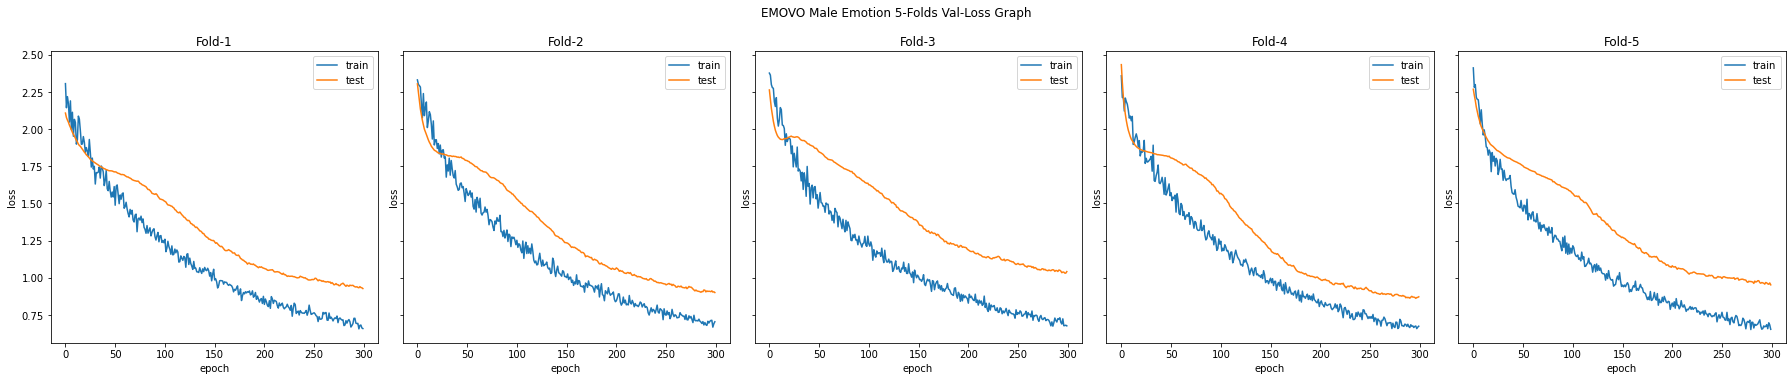

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2,ax3, ax4,ax5) = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True,figsize=(25,5))

fig.suptitle('EMOVO Male Emotion 5-Folds Val-Loss Graph', y=1.05)
ax1.plot(hist[0].history['loss'])
ax1.plot(hist[0].history['val_loss'])
ax1.set_title('Fold-1')
#ax1.set_ylabel('Population')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')

ax2.plot(hist[1].history['loss'])
ax2.plot(hist[1].history['val_loss'])
ax2.set_title('Fold-2')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')

ax3.plot(hist[2].history['loss'])
ax3.plot(hist[2].history['val_loss'])
ax3.set_title('Fold-3')
ax3.set_ylabel('loss')
ax3.set_xlabel('epoch')

ax4.plot(hist[3].history['loss'])
ax4.plot(hist[3].history['val_loss'])
ax4.set_title('Fold-4')
ax4.set_ylabel('loss')
ax4.set_xlabel('epoch')

ax5.plot(hist[4].history['loss'])
ax5.plot(hist[4].history['val_loss'])
ax5.set_title('Fold-5')
ax5.set_ylabel('loss')
ax5.set_xlabel('epoch')

ax1.legend(['train', 'test'], loc='upper right')
ax2.legend(['train', 'test'], loc='upper right')
ax3.legend(['train', 'test'], loc='upper right')
ax4.legend(['train', 'test'], loc='upper right')
ax5.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
plt.show()

fig.savefig('drive/MyDrive/emotion/EmovoMale_5x1.png')

In [ ]:
s=0.
scoreAcc=[]
for i in scores:
    scoreAcc.append("{:0.5f}".format(i[1]))
    s=s+i[1] #*100, scores[i][0]))
    #print(s)
print("Ave: %.4f%% " % (s/len(scores)))
#list = "%.4f" % scoreAcc
print(scoreAcc)

Ave: 0.7586% 
['0.74576', '0.74576', '0.71186', '0.79661', '0.79310']


In [ ]:
scores

[[0.9280520677566528, 0.7457627058029175],
 [0.9014169573783875, 0.7457627058029175],
 [1.0421406030654907, 0.7118644118309021],
 [0.8727552890777588, 0.7966101765632629],
 [0.9530341029167175, 0.7931034564971924]]

In [ ]:
model_name = 'EmovoMale_model.h5'
maindir='drive/MyDrive/emotion/'
save_dir = os.path.join(maindir, 'Emovo_5-fold')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
m1.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at drive/MyDrive/emotion/Emovo_5-fold/EmovoMale_model.h5 


In [ ]:
import json
model_json = m1.to_json()
with open(maindir+"Emovo_5-fold/EmovoMale_model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# loading json and creating model
from keras.models import model_from_json
json_file = open(maindir+'Emovo_5-fold/EmovoMale_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(maindir+"Emovo_5-fold/EmovoMale_model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 79.31%


In [ ]:
import pandas as pd

y_pred = loaded_model.predict(x_testcnn)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
  yy.append(np.argmax(j))
print(len(yy))

for j in y_test:
  ya.append(np.argmax(j))
from sklearn.metrics import confusion_matrix

cm11=confusion_matrix(ya, yy)
cm11
#alltaki son olan, önemli

(58, 7)
58


array([[6, 0, 0, 1, 0, 0, 1],
       [1, 5, 0, 0, 0, 2, 0],
       [0, 0, 8, 1, 0, 0, 0],
       [0, 0, 0, 6, 0, 2, 0],
       [1, 0, 0, 0, 7, 1, 0],
       [0, 1, 0, 1, 0, 6, 0],
       [0, 0, 0, 0, 0, 0, 8]])

In [ ]:
lb.classes_

array([1, 2, 3, 4, 5, 6, 7])

In [ ]:
import pandas as pd

##önemli, yakın olan bu..
#loaded_model=modelArr[1] 

y_pred = modelArr[3].predict(x_testcnn)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
    yy.append(np.argmax(j))
print(len(yy))

for j in y_test:
    ya.append(np.argmax(j))
from sklearn.metrics import confusion_matrix

cm2=confusion_matrix(ya, yy)
#sonuç yanlış

(58, 7)
58


In [ ]:
cm2

array([[8, 0, 0, 0, 0, 0, 0],
       [0, 8, 0, 0, 0, 0, 0],
       [0, 0, 9, 0, 0, 0, 0],
       [0, 0, 0, 8, 0, 0, 0],
       [1, 0, 0, 1, 7, 0, 0],
       [0, 0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 0, 0, 8]])

In [ ]:
cm11

array([[6, 0, 0, 1, 0, 0, 1],
       [1, 5, 0, 0, 0, 2, 0],
       [0, 0, 8, 1, 0, 0, 0],
       [0, 0, 0, 6, 0, 2, 0],
       [1, 0, 0, 0, 7, 1, 0],
       [0, 1, 0, 1, 0, 6, 0],
       [0, 0, 0, 0, 0, 0, 8]])

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(cm11, dtype=float)
df_cm = pd.DataFrame(array)

In [ ]:
arr = np.array(cm11, dtype=float)
for it in range(0, 7):
  sum1 = arr.sum(axis=1)
  for it2 in range(0, 7):
    arr[it][it2] = round(arr[it][it2] * 100.0/sum1[it],1)

In [ ]:
arr
df_cm1 = pd.DataFrame(arr)

     0    1    2    3    4    5    6
0  6.0  0.0  0.0  1.0  0.0  0.0  1.0
1  1.0  5.0  0.0  0.0  0.0  2.0  0.0
2  0.0  0.0  8.0  1.0  0.0  0.0  0.0
3  0.0  0.0  0.0  6.0  0.0  2.0  0.0
4  1.0  0.0  0.0  0.0  7.0  1.0  0.0
5  0.0  1.0  0.0  1.0  0.0  6.0  0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  8.0



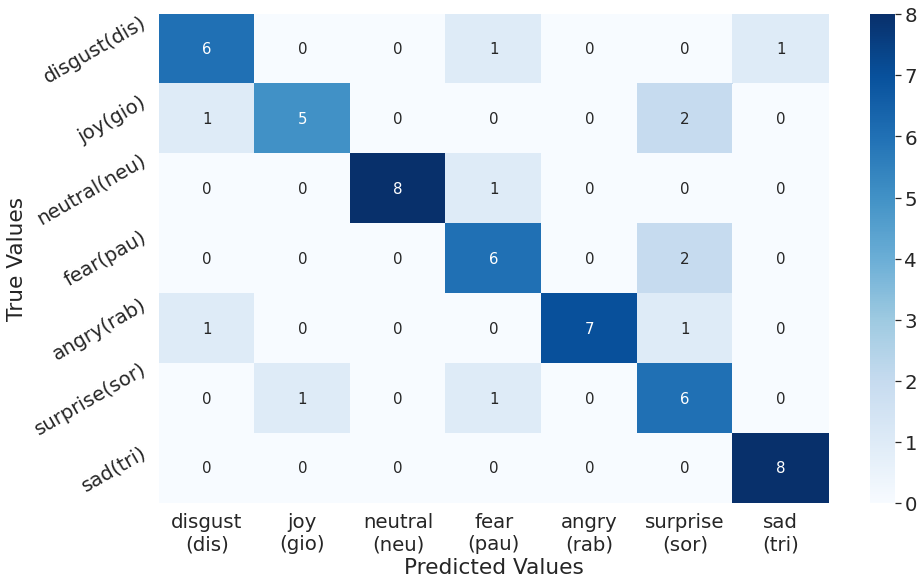

In [ ]:
print(df_cm)
print()
plt.figure(figsize = (15,9))
sns.set(font_scale=1.8)
aa=sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='g', annot_kws={"size": 15},)
aa.set_xticklabels(['disgust\n(dis)', 'joy\n(gio)', 'neutral\n(neu)','fear\n(pau)', 'angry\n(rab)', 'surprise\n(sor)', 'sad\n(tri)'])
aa.set_yticklabels(['disgust(dis)', 'joy(gio)', 'neutral(neu)','fear(pau)', 'angry(rab)', 'surprise(sor)', 'sad(tri)'],rotation=30)
aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig(maindir+'SnsEmovoMale.png')
plt.show()


      0     1     2     3     4     5      6
0  75.0   0.0   0.0  12.5   0.0   0.0   12.5
1  12.5  62.5   0.0   0.0   0.0  25.0    0.0
2   0.0   0.0  88.9  11.1   0.0   0.0    0.0
3   0.0   0.0   0.0  75.0   0.0  25.0    0.0
4  11.1   0.0   0.0   0.0  77.8  11.1    0.0
5   0.0  12.5   0.0  12.5   0.0  75.0    0.0
6   0.0   0.0   0.0   0.0   0.0   0.0  100.0



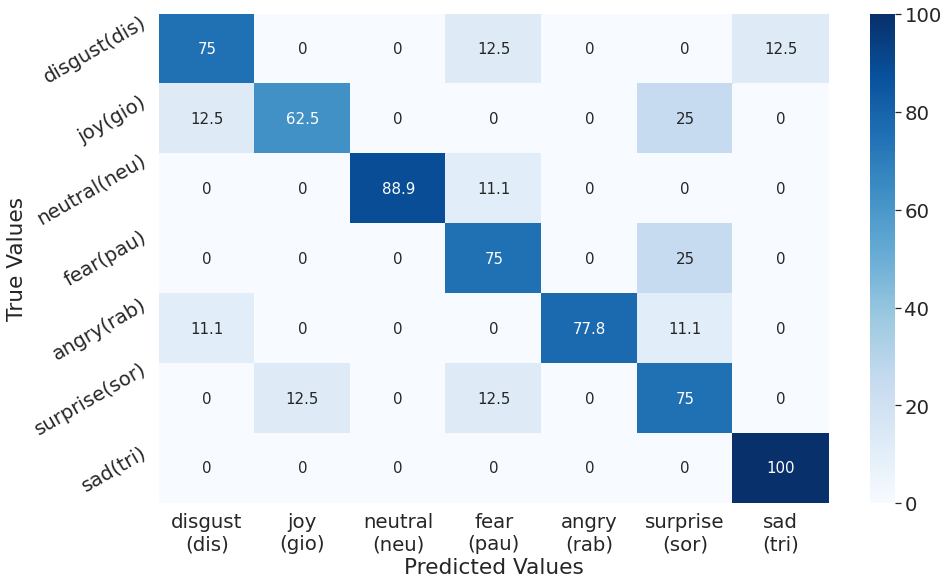

In [ ]:
print(df_cm1)
print()
plt.figure(figsize = (15,9))
sns.set(font_scale=1.8)
aa=sns.heatmap(df_cm1, annot=True, cmap="Blues", fmt='g', annot_kws={"size": 15},)
aa.set_xticklabels(['disgust\n(dis)', 'joy\n(gio)', 'neutral\n(neu)','fear\n(pau)', 'angry\n(rab)', 'surprise\n(sor)', 'sad\n(tri)'])
aa.set_yticklabels(['disgust(dis)', 'joy(gio)', 'neutral(neu)','fear(pau)', 'angry(rab)', 'surprise(sor)', 'sad(tri)'],rotation=30)
aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig(maindir+'SnsEmovoPercentMale.png')
plt.show()